# Pymaceuticals Inc.
---

### Analysis

**OBJECTIVE**: As senior data analyst of Pymaceuticals, Inc., my objective is to provide a top-level summary of study results (at least three observations or inferences).

**PROCEDURES**: To do this, I obtained the [Mouse_metadata.csv](https://github.com/rperez025/matplotlib-challenge/blob/main/Pymaceuticals/data/Mouse_metadata.csv) and [Study_results.csv](https://github.com/rperez025/matplotlib-challenge/blob/main/Pymaceuticals/data/Study_results.csv) datasets and used python coding, Pandas DataFrames, and Matplotlib to create all tables and figures needed for the technical report of the clinical study.

**OUTPUT**: Based on the above, I used python coding, Pandas DataFrames, and Matplotlib to develop the following tables and figures:

* Cleaned combined DataFrame (Joining Mouse_metadata.csv and Study_results.csv, dropping duplicate Mouse ID)
* Summary Statistics Table (Drug Regimen vs Tumor Volume
* No. of Observed Mouse Timepoints per Drug Regiment - Bar Chart
* Distribution of Female vs. Male Mice in the Study - Pie Chart
* Distribution of Tumor Volume for each Treatment - Box Plot
* Capomulin treatment of Mouse l509 - Line Chart
* Mouse Weight vs. Average Observed Tumor Volume - Scattor Plot
* Mouse Weight vs. Average Observed Tumor Volume - Scattor Plot **AND** Linear Regression Line

_NOTE: Please see cells below this "Pymaceuticals Inc. Analysis" section for results of the above tables and figures._

**OBSERVATIONS/INFERENCES**:
* Distribution of Tumor Volume for each Treatment - Box Plot:
    - Comparison across treatments: Ramicane has a lower median compared to Capomulin; Infubinol and Ceftamin have higher medians than both Ramicane and Capomulin. Since Ramicane's and Capomulin's medians are close, this may indicate the efficacy of the drugs - advance them for further study.
    - Variability of the tumor volume data: Capomulin has a tighter box which may indicate less variability in the test results
    - Outliers present: Infubinol has one outlier which may indicate an unusual response (exceptionally good or poor) to the drug treatment

* Capomulin treatment of Mouse l509 - Line Chart:
    - Trend of Tumor Volume over Time: Over time, the data indicates that Mouse l509's tumor volume decreases over time with the Capomulin regimen.

* Mouse Weight vs. Average Observed Tumor Volume - Scattor Plot **AND** Linear Regression Line:
    - Correlation: Since the correlation is 0.84, this indicates there is a strong correlation between mouse weight and the average tumor volume.
    - Utility of mouse weight as a factor in studies: With a strong correlation (0.84), researchers could continue to use mouse weight in studies for its impact on tumor volume.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
# Imported numpy for support working with arrays and matrices
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combinedDF = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
combinedDF.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [2]:
# Checking the number of mice.
mouse_metadata["Mouse ID"].count()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicateMice = combinedDF[combinedDF.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicateMiceIDs = duplicateMice["Mouse ID"].unique()
result = np.array(duplicateMiceIDs, dtype=object)
print(result)

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combinedDF.loc[combinedDF["Mouse ID"]=="g989", :]

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         30           59.082294                 1     Propriva   
1592     g989         35           62.570880                 2     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female          21          26  
329   Female          21          26  
360   Female          21          26  
620   Female          21          26  
681   Female          21          26  
815   Female          21          26  
869   Female          21          26  
950   Female          21          26  
1111  Female          21          26  
1195  Female          21          26  
1380  Female          21          26  
1592  Female          21          26

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combinedCleanedDF = combinedDF[combinedDF["Mouse ID"] != "g989"]
combinedCleanedDF.head()

# Perform check from non-cleaned to cleaned DataFrame
#combinedDF["Mouse ID"].count() # 1893 mice
#combinedCleanedDF["Mouse ID"].count() # 1880 mice, difference is 13, which is equal to 13 instances 
                                      # of duplicate mouse ("g989") above.

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [6]:
# Checking the number of mice in the clean DataFrame.
number_ofMiceCleaned = combinedCleanedDF["Mouse ID"].nunique()
print(f"{number_ofMiceCleaned}")

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# The following groups the data from the combinedCleanedDF by "Drug Regimen" object to allow for aggregate calculations
SummaryDrugRegimen = combinedCleanedDF.groupby(["Drug Regimen"])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
SummaryStatsTable = SummaryDrugRegimen["Tumor Volume (mm3)"].mean().reset_index(name="Mean Tumor Volume")
SummaryStatsTable = pd.merge(SummaryStatsTable, SummaryDrugRegimen["Tumor Volume (mm3)"].median().reset_index(name="Median Tumor Volume"), on="Drug Regimen", how="left")
SummaryStatsTable = pd.merge(SummaryStatsTable, SummaryDrugRegimen["Tumor Volume (mm3)"].var().reset_index(name="Tumor Volume Variance"), on="Drug Regimen", how="left")
SummaryStatsTable = pd.merge(SummaryStatsTable, SummaryDrugRegimen["Tumor Volume (mm3)"].std().reset_index(name="Tumor Volume Std. Dev."), on="Drug Regimen", how="left")
SummaryStatsTable = pd.merge(SummaryStatsTable, SummaryDrugRegimen["Tumor Volume (mm3)"].sem().reset_index(name="Tumor Volume Std. Err."), on="Drug Regimen", how="left")

# The following sets the "Drug Regimen" names as the Panda DataFrames index
SummaryStatsTable = SummaryStatsTable.set_index("Drug Regimen")

SummaryStatsTable

Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466  
Placebo                     7.821003                0.581331  
Propriva                    6.622085                0.544332  
Ramicane                    4.846308                0.320955  
Stelasyn                    7.710419                0.573111  
Zoniferol                   6.966589                0.516398

In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
SummaryStatsTable2 = combinedCleanedDF[["Drug Regimen", "Tumor Volume (mm3)"]].groupby(["Drug Regimen"]).agg(["mean", "median","var","std","sem"])
SummaryStatsTable2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

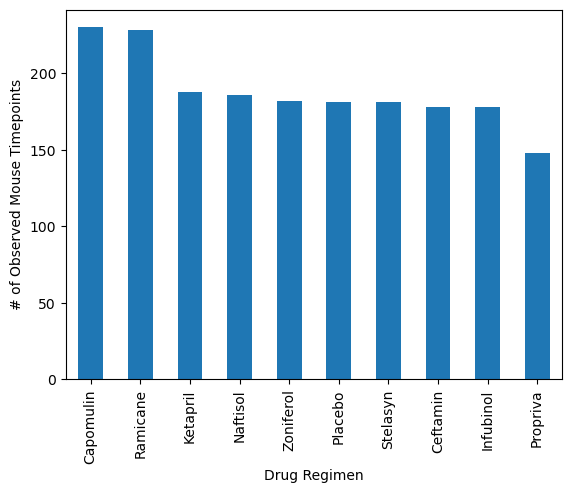

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# First, use .groupby and count for each drug regimen for the x axis
MseIDTimepoints = combinedCleanedDF.groupby(["Drug Regimen"])["Timepoint"].count()

# Next, plot the bar chart using .plot.bar(); sort in ascending order
MseIDTimepoints.sort_values(ascending=False).plot.bar()
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()

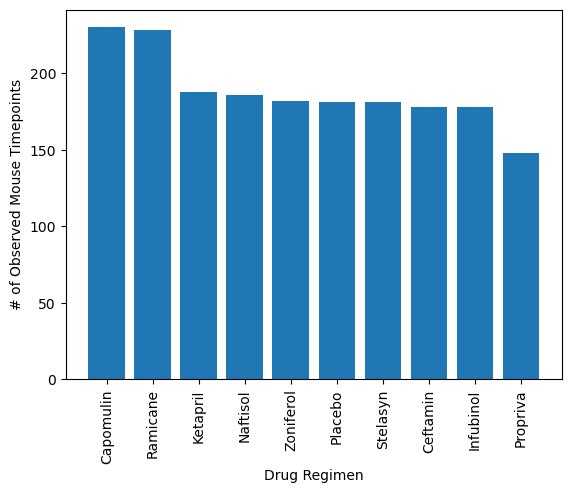

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# First, sort values of "Drug Regimens" in descending order
MseIDTimepoints = MseIDTimepoints.sort_values(ascending=False)

# Then, use pyplot function to create bar chart and include code to define xlabel and ylabel and rotation of xticks
plt.bar(MseIDTimepoints.index, MseIDTimepoints.values) 
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints", size=10)
plt.xticks(rotation="vertical")

plt.show()

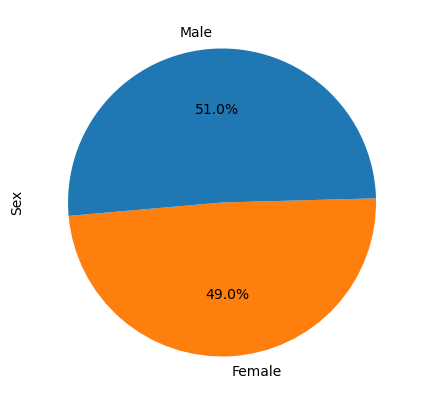

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# First, use .groupby on combinedCleanedDF to group by sex and then perform a count using .count()
femaleVsMale = combinedCleanedDF.groupby(["Sex"])["Sex"].count()

# Define a custom color list (pandas default color palette): "blue" for "Male" and "orange" for "Female"
colors = ["#ff7f0e" if sex == "Female" else "#1f77b4" for sex in femaleVsMale.index]

# Then, plot the pie chart using .plot.pie() including relevant customizations; use ";" at end of code to suppress 
# textual representation of the axes object
femaleVsMale.plot.pie(startangle=185, autopct="%1.1f%%", figsize=(5, 5), colors=colors);

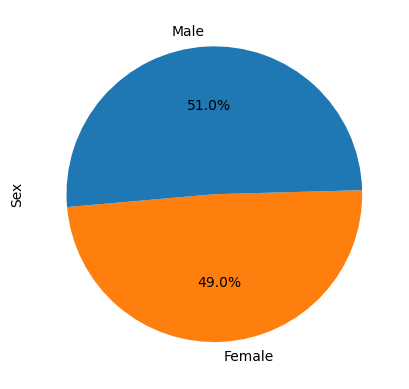

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# First, define a custom color list (pandas default color palette): "blue" for "Male" and "orange" for "Female"
colors = ["#ff7f0e" if sex == "Female" else "#1f77b4" for sex in femaleVsMale.index]

# Then, create pie chart by applying plt.pie() to the femaleVsMale variable above, including coding for customizations 
plt.pie(femaleVsMale, labels=("Female", "Male"), startangle=185, autopct='%1.1f%%', colors=colors)

# Add ylabel
plt.ylabel("Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Obtain the combinedCleanedDF and apply .groupby() of "Mouse ID" and the last (greatest) timepoint
lastTimepoint = combinedCleanedDF.groupby(["Mouse ID"])["Timepoint"].max()

# Then, convert lastTimepoint into a DataFrame for merging
lastTimepointDF = pd.DataFrame(lastTimepoint)

# Reset the index of the lastTimepointDF DataFrame


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# First, use RIGHT join to merge lastTimepointDF into combinedCleanedDF on "Mouse ID" and "Timepoint" so it
# only records the MAX timepoints
finalTumorVol = pd.merge(combinedCleanedDF, lastTimepointDF, on=('Mouse ID', 'Timepoint'), how='right')
finalTumorVol

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0       a203         45           67.973419                 2    Infubinol   
1       a251         45           65.525743                 1    Infubinol   
2       a262         45           70.717621                 4      Placebo   
3       a275         45           62.999356                 3     Ceftamin   
4       a366         30           63.440686                 1     Stelasyn   
..       ...        ...                 ...               ...          ...   
243     z435         10           48.710661                 0     Propriva   
244     z578         45           30.638696                 0     Ramicane   
245     z581         45           62.754451                 3    Infubinol   
246     z795         45           65.741070                 3     Naftisol   
247     z969         45           73.867845                 4     Naftisol   

        Sex  Age_months  Weight (g)  
0    Female          20          23  
1    Female          21          25  
2    Female          17          29  
3    Female          20          28  
4    Female          16          29  
..      ...         ...         ...  
243  Female          12          26  
244    Male          11          16  
245  Female          24          25  
246  Female          13          29  
247    Male           9          30  

[248 rows x 8 columns]

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatmentNames = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorCapVol = []
tumorRamVol = []
tumorInfVol = []
tumorCeftVol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers (see next cell
# for code/calculations). 

    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in finalTumorVol.iterrows():
    if row["Drug Regimen"] == treatmentNames[0]:
        tumorCapVol.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatmentNames[1]:
        tumorRamVol.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatmentNames[2]:
        tumorInfVol.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatmentNames[3]:
        tumorCeftVol.append(row['Tumor Volume (mm3)'])
    
    # add subset
# Created a new DataFram to have four columns for each drug regimen with the values equal to 
# tumor volumes for the mice
drugTumorDF = pd.DataFrame(
    {treatmentNames[0]: tumorCapVol,
     treatmentNames[1]: tumorRamVol,
     treatmentNames[2]: tumorInfVol,
     treatmentNames[3]: tumorCeftVol
    })

drugTumorDF
    
    # Determine outliers using upper and lower bounds (see next cell for code/calculations)

Capomulin   Ramicane  Infubinol   Ceftamin
0   38.982878  38.407618  67.973419  62.999356
1   38.939633  43.047543  65.525743  45.000000
2   30.485985  38.810366  57.031862  56.057749
3   37.074024  32.978522  66.083066  55.742829
4   40.159220  38.342008  72.226731  48.722078
5   47.685963  33.397653  36.321346  47.784682
6   37.311846  37.311236  60.969711  61.849023
7   38.125164  40.659006  62.435404  68.923185
8   38.753265  29.128472  60.918767  67.748662
9   41.483008  33.562402  67.289621  57.918381
10  38.846876  36.374510  66.196912  46.784535
11  28.430964  31.560470  62.117279  59.851956
12  33.329098  36.134852  47.010364  64.299830
13  46.539206  22.050126  60.165180  59.741901
14  32.377357  30.564625  55.629428  61.433892
15  41.581521  31.095335  45.699331  64.192341
16  23.343598  45.220869  54.656549  45.000000
17  40.728578  36.561652  55.650681  52.925348
18  34.455298  37.225650  46.250112  45.000000
19  31.023923  43.419381  54.048608  67.527482
20  40.658124  30.276232  51.542431  45.000000
21  39.952347  40.667713  50.005138  64.634949
22  36.041047  43.166373  58.268442  61.386660
23  28.484033  44.183451  67.685569  68.594745
24  31.896238  30.638696  62.754451  64.729837

In [15]:
# (continued from above cell)
# Calculate the quartiles and IQR and quantitatively determine if there are any 
# potential outliers - Determine outliers using upper and lower bounds.

# Calculated the quartiles, IQR and potential outliers' boundaries for the tumor volume data associated with
# each of the drug regimens (i.e., Capomulin [0], Ramicane [1], Infubinol [2], Ceftamin [3])
quart_Cap = drugTumorDF[treatmentNames[0]].quantile([.25, .5, .75])
lower_Cap = quart_Cap[.25]
med_Cap = quart_Cap[.5]
upper_Cap = quart_Cap[.75]
iqr_Cap = upper_Cap-lower_Cap
lowBound_Cap = lower_Cap - (1.5 * iqr_Cap)
upbBound_Cap = upper_Cap + (1.5 * iqr_Cap)
max_Cap = drugTumorDF[treatmentNames[0]].max()
min_Cap = drugTumorDF[treatmentNames[0]].min()

quart_Ram = drugTumorDF[treatmentNames[1]].quantile([.25, .5, .75])
lower_Ram = quart_Ram[.25]
med_Ram = quart_Ram[.5]
upper_Ram = quart_Ram[.75]
iqr_Ram = upper_Ram-lower_Ram
lowBound_Ram = lower_Ram - (1.5 * iqr_Ram)
upbBound_Ram = upper_Ram + (1.5 * iqr_Ram)
max_Ram = drugTumorDF[treatmentNames[1]].max()
min_Ram = drugTumorDF[treatmentNames[1]].min()

quart_Inf = drugTumorDF[treatmentNames[2]].quantile([.25, .5, .75])
lower_Inf = quart_Inf[.25]
med_Inf = quart_Inf[.5]
upper_Inf = quart_Inf[.75]
iqr_Inf = upper_Inf-lower_Inf
lowBound_Inf = lower_Inf - (1.5 * iqr_Inf)
upbBound_Inf = upper_Inf + (1.5 * iqr_Inf)
max_Inf = drugTumorDF[treatmentNames[2]].max()
min_Inf = drugTumorDF[treatmentNames[2]].min()

quart_Ceft = drugTumorDF[treatmentNames[3]].quantile([.25, .5, .75])
lower_Ceft = quart_Ceft[.25]
med_Ceft = quart_Ceft[.5]
upper_Ceft = quart_Ceft[.75]
iqr_Ceft = upper_Ceft-lower_Ceft
lowBound_Ceft = lower_Ceft - (1.5 * iqr_Ceft)
upbBound_Ceft = upper_Ceft + (1.5 * iqr_Ceft)
max_Ceft = drugTumorDF[treatmentNames[3]].max()
min_Ceft = drugTumorDF[treatmentNames[3]].min()

# Creating a DataFrame to summarize the above quartile, IQR, lower and upper bound, max and min information for
# ease of reference
StatTableTumorVol = pd.DataFrame({"Drug": treatmentNames,
                         "Lower Quartile":[lower_Cap, lower_Ram, lower_Inf, lower_Ceft],
                         "Upper Quartile":[upper_Cap, upper_Ram, upper_Inf, upper_Ceft],
                         "IQR":[iqr_Cap, iqr_Ram, iqr_Inf, iqr_Ceft],
                         "Median":[med_Cap, med_Ram, med_Inf, med_Ceft],
                        "Upper Bound": [upbBound_Cap, upbBound_Ram, upbBound_Inf, upbBound_Ceft],
                        "Lower Bound": [lowBound_Cap, lowBound_Ram, lowBound_Inf, lowBound_Ceft],
                        "Max": [max_Cap, max_Ram, max_Inf, max_Ceft],
                         "Min": [min_Cap, min_Ram, min_Inf, min_Ceft]
                        })
StatTableTumorVol


Drug  Lower Quartile  Upper Quartile        IQR     Median  \
0  Capomulin       32.377357       40.159220   7.781863  38.125164   
1   Ramicane       31.560470       40.659006   9.098537  36.561652   
2  Infubinol       54.048608       65.525743  11.477135  60.165180   
3   Ceftamin       48.722078       64.299830  15.577752  59.851956   

   Upper Bound  Lower Bound        Max        Min  
0    51.832015    20.704562  47.685963  23.343598  
1    54.306811    17.912664  45.220869  22.050126  
2    82.741446    36.832905  72.226731  36.321346  
3    87.666458    25.355450  68.923185  45.000000

In [16]:
# Filter the drugTumorDF DataFrame for the upper and lower bounds of each drug regimen to determine outliers (see 
# next 3 cells below for Ramicane, Infubinol, and Ceftamin):

# Capomulin: Lower and Upper Bound (will comment out if no outliers noted)
#outlier_LowCap = drugTumorDF["Capomulin"] < 20.704562
#filtered_outlierLowCap = drugTumorDF[outlier_LowCap]
#filtered_outlierLowCap

#outlier_UpCap = drugTumorDF["Capomulin"] > 51.832015
#filtered_outlierUpCap = drugTumorDF[outlier_UpCap]
#filtered_outlierUpCap

In [17]:
# Ramicane: Lower and Upper Bound (will comment out if no outliers noted)
#outlier_LowRam = drugTumorDF["Ramicane"] < 17.912664
#filtered_outlierLowRam = drugTumorDF[outlier_LowRam]
#filtered_outlierLowRam

#outlier_UpRam = drugTumorDF["Ramicane"] > 54.306811
#filtered_outlierUpRam = drugTumorDF[outlier_UpRam]
#filtered_outlierUpRam



In [18]:
# Infubinol: Lower and Upper Bound (will comment out if no outliers noted)
outlier_LowInf = drugTumorDF["Infubinol"] < 36.832905
filtered_outlierLowInf = drugTumorDF[outlier_LowInf]
#filtered_outlierLowInf

# Based on the results of filtered_outlierLowInf above, print f string identifying an outlier for Infubinol
print(f"There is an outlier for the Infubinol regimen since a mouse had a tumor size of 36.321346.")


#outlier_UpInf = drugTumorDF["Infubinol"] > 82.741446
#filtered_outlierUpInf = drugTumorDF[outlier_UpInf]
#filtered_outlierUpInf

There is an outlier for the Infubinol regimen since a mouse had a tumor size of 36.321346.


In [19]:
# Ceftamin: Lower and Upper Bound (will comment out if no outliers noted)
#outlier_LowCef = drugTumorDF["Ceftamin"] < 25.355450
#filtered_outlierLowCef = drugTumorDF[outlier_LowCef]
#filtered_outlierLowCef

#outlier_UpCef = drugTumorDF["Ceftamin"] > 87.666458
#filtered_outlierUpCef = drugTumorDF[outlier_UpCef]
#filtered_outlierUpCef

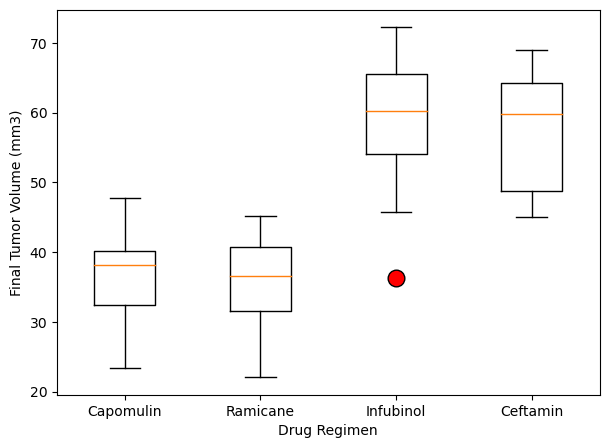

In [20]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create a list to use for the box plot - each list is a list of each drug's final tumor volume for all mice
boxplotList = [drugTumorDF[treatmentNames[0]],
                drugTumorDF[treatmentNames[1]],
                drugTumorDF[treatmentNames[2]],
                drugTumorDF[treatmentNames[3]]
               ]

# Use plt.subplots to define the size of the box plot
fig, ax = plt.subplots(figsize=(7,5))
# Set the x label
ax.set_xlabel("Drug Regimen") 
# Set the y label
ax.set_ylabel("Final Tumor Volume (mm3)")

# Use ax.boxplot and run boxplotList parameter to create the box plot, including use of "flierprops" parameter to
# adjust the marker characteristics
flierprops = dict(marker="o", markerfacecolor="red", markersize=12, markeredgecolor="black")
ax.boxplot(boxplotList, 0, flierprops=flierprops)
# Sets the tick locations and labels for each box in the box plot
plt.xticks([1, 2, 3, 4], treatmentNames)

# Display the box plot
plt.show()

## Line and Scatter Plots

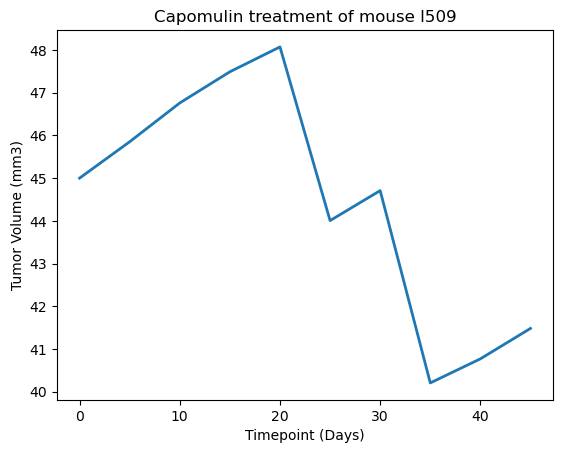

In [21]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Create a new DataFrame using .loc[] that includes the data for Mouse ID l509
line_l509DF = combinedCleanedDF.loc[combinedCleanedDF["Mouse ID"] == "l509", :]
line_l509DF

# Defining the x-axis for the timepoints the tumor volumes were measured
xaxisTP = line_l509DF["Timepoint"]

# Defining the y-axis for the tumor volumes measured at each timepoint
yaxisTumVol = line_l509DF["Tumor Volume (mm3)"]

# Setting up the line plot
# Create the title of the line chart
plt.title("Capomulin treatment of mouse l509")
# Use plt.plot() to plot the line chart with x- and y-axis labels and customizations
plt.plot(xaxisTP, yaxisTumVol, linewidth=2, markersize=10)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

# Display the line chart
plt.show()

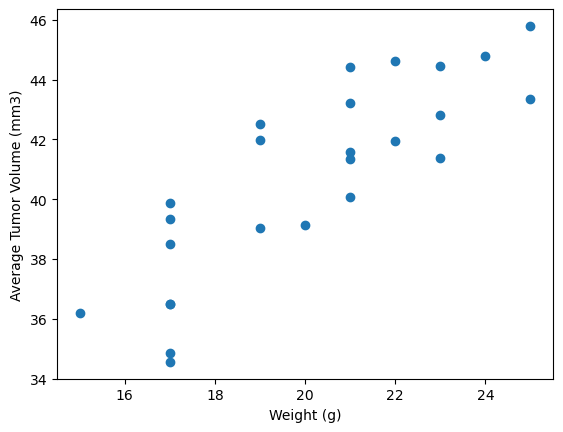

In [22]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Create a new DataFrame using .loc[] that includes the data for Capomulin drug regimen
scatter_CapDF = combinedCleanedDF.loc[combinedCleanedDF["Drug Regimen"] == "Capomulin", :]

# Create a second DataFrame using .groupby() and .mean() applied to scatter_CapDF to calculate averages of all
# numeric columns for each mouse using the Capomulin drug regimen
CapAvg = scatter_CapDF.groupby(["Mouse ID"]).mean(numeric_only=True) # Updated code with ".mean(numeric_only=True)"
                                                                     # since received error for future Pandas update

# Setting up the scatter plot
# Use plt.scatter() on CapAvg to plot the scatter plot with x-axis ("Weight (g)") and y-axis ("Average Tumor Volume
# (mm3)") and x and y labels
plt.scatter(CapAvg["Weight (g)"], CapAvg["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Display the scatterplot
plt.show()

## Correlation and Regression

In [23]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Use the st.pearsonr() function and the CapAvg DataFrame from above to calculate the r value, which identifies
# a linear value with a high degree of correlation if the r value is close to 1; no correlation if 0; or a
# high degree of negative correlation if close to -1

weightTumVolCorr = st.pearsonr(CapAvg["Weight (g)"], CapAvg["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {round(weightTumVolCorr[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84


In [24]:
# Create a variable that holds the calculated linear regression model values using st.linregress() function 
# and parameters from the CapAvg dataframe
linRegressModel = st.linregress(CapAvg['Weight (g)'], CapAvg['Tumor Volume (mm3)'])
linRegressModel

LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

In [25]:
# Determine the slope and y-intercept of the regression line using the linRegressModel results
slope = 0.9544396890241049
intercept = 21.552160532685008

The correlation between mouse weight and the average tumor volume is 0.84


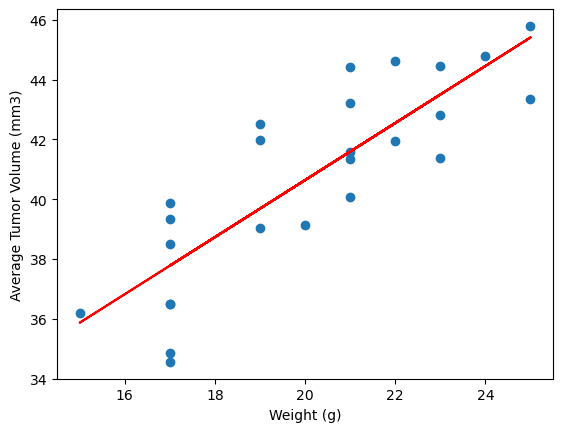

In [26]:
# Plot the regression line
# First, calculate the linear line plot list of values
weightTumVolLine = slope * (CapAvg["Weight (g)"]) + intercept

# (Re-create the scatter plot from above) Setting up the scatter plot - Use plt.scatter() on CapAvg to plot the
# scatter plot with x-axis ("Weight (g)") and y-axis ("Average Tumor Volume (mm3)") and x and y labels
plt.scatter(CapAvg["Weight (g)"], CapAvg["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Copy over the print from the above correlation cell to display with scatter plot and linear regression line
print(f"The correlation between mouse weight and the average tumor volume is {round(weightTumVolCorr[0],2)}")

# Plot the linear regression line
plt.plot(CapAvg["Weight (g)"], weightTumVolLine, "r");